## **FeyNN Labs: Project - 2**
**Electric Vehicle (EV) Market Segmentation in India 2024**
=====================================

----------

#### **Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### **Load the dataset**

In [2]:
df = pd.read_csv(r'EV_market_segmentation_India.csv') 

#### **Shape of the dataset**

In [3]:
df.shape

(600, 12)

#### **Head of the dataset**

In [4]:
df.head() 

,State,City,Income Group,Age Group,Daily Commute (km),EV Awareness Score,Charging Stations Density (per 100 sq km),Preferred EV Type,Govt Incentive Awareness,EV Sales (2024),ICE to EV Switch (%),Target Segment
0,Karnataka,Bangalore,Low,26-35,21,5.1,5,Truck/Commercial,No,3877,13.5,Budget Segment
1,Karnataka,Bangalore,Low,18-25,22,5.2,14,Sedan/SUV,Yes,14633,14.4,Budget Segment
2,Karnataka,Bangalore,High,18-25,6,8.7,17,Scooter/Bike,No,11330,9.1,General Segment
3,Karnataka,Bangalore,Mid,26-35,7,8.8,3,Scooter/Bike,No,10460,18.0,Mid-range Consumer
4,Karnataka,Bangalore,Mid,50+,40,5.3,13,Scooter/Bike,Yes,5235,6.0,Frequent Commuter


#### **Tail of the dataset**

In [5]:
df.tail()

,State,City,Income Group,Age Group,Daily Commute (km),EV Awareness Score,Charging Stations Density (per 100 sq km),Preferred EV Type,Govt Incentive Awareness,EV Sales (2024),ICE to EV Switch (%),Target Segment
595,Gujarat,Ahmedabad,Mid,18-25,37,9.3,13,Scooter/Bike,No,14213,19.5,Frequent Commuter
596,Gujarat,Ahmedabad,High,36-50,36,7.1,6,Sedan/SUV,No,13149,15.8,Premium Segment
597,Gujarat,Ahmedabad,High,26-35,12,5.7,12,Sedan/SUV,Yes,5801,13.9,Premium Segment
598,Gujarat,Ahmedabad,High,18-25,34,5.3,17,Scooter/Bike,No,3641,19.5,General Segment
599,Gujarat,Ahmedabad,High,50+,16,5.3,15,Truck/Commercial,Yes,11574,13.9,General Segment


#### **Data types of the dataset**

In [6]:
df.dtypes

State                                         object
City                                          object
Income Group                                  object
Age Group                                     object
Daily Commute (km)                             int64
EV Awareness Score                           float64
Charging Stations Density (per 100 sq km)      int64
Preferred EV Type                             object
Govt Incentive Awareness                      object
EV Sales (2024)                                int64
ICE to EV Switch (%)                         float64
Target Segment                                object
dtype: object

#### **Info of the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State                                      600 non-null    object 
 1   City                                       600 non-null    object 
 2   Income Group                               600 non-null    object 
 3   Age Group                                  600 non-null    object 
 4   Daily Commute (km)                         600 non-null    int64  
 5   EV Awareness Score                         600 non-null    float64
 6   Charging Stations Density (per 100 sq km)  600 non-null    int64  
 7   Preferred EV Type                          600 non-null    object 
 8   Govt Incentive Awareness                   600 non-null    object 
 9   EV Sales (2024)                            600 non-null    int64  
 10  ICE to EV Switch (%)      

#### **Info of the columns**

In [8]:
df.columns

Index(['State', 'City', 'Income Group', 'Age Group', 'Daily Commute (km)',
       'EV Awareness Score', 'Charging Stations Density (per 100 sq km)',
       'Preferred EV Type', 'Govt Incentive Awareness', 'EV Sales (2024)',
       'ICE to EV Switch (%)', 'Target Segment'],
      dtype='object')

#### **check the null values of the dataset**

In [9]:
df.isnull().sum()

State                                        0
City                                         0
Income Group                                 0
Age Group                                    0
Daily Commute (km)                           0
EV Awareness Score                           0
Charging Stations Density (per 100 sq km)    0
Preferred EV Type                            0
Govt Incentive Awareness                     0
EV Sales (2024)                              0
ICE to EV Switch (%)                         0
Target Segment                               0
dtype: int64

## **Exploratory Data Analysis**

#### **Statistical analysis**

In [10]:
df.describe()

,Daily Commute (km),EV Awareness Score,Charging Stations Density (per 100 sq km),EV Sales (2024),ICE to EV Switch (%)
count,600.000000,600.00000,600.000000,600.000000,600.000000
mean,22.636667,7.27400,11.851667,8168.131667,12.399667
std,10.313677,1.29675,5.129671,4008.084382,4.430932
min,5.000000,5.00000,3.000000,1014.000000,5.000000
25%,14.000000,6.10000,7.000000,4695.750000,8.500000
50%,23.000000,7.35000,12.000000,8243.500000,12.600000
75%,32.000000,8.40000,16.000000,11587.000000,16.300000
max,40.000000,9.50000,20.000000,14996.000000,20.000000


#### Identifying Target Customer Segments for EV Marketing

Top Customer Segments for EV Marketing:
   Income Group Age Group       City  EV Sales (2024)  ICE to EV Switch (%)
10         High     26-35  Ahmedabad           137283             13.023529
79          Mid     18-25  Ahmedabad           103270             13.911111
78          Low       50+     Mumbai            93278             12.866667
40          Low     18-25  Ahmedabad            87666             12.790000
42          Low     18-25    Chennai            86528             12.244444
88          Mid     18-25     Mumbai            85467             12.122222
98          Mid     36-50  Ahmedabad            83685             14.611111
58          Low     26-35     Mumbai            80999             12.566667
48          Low     18-25     Mumbai            79858             13.333333
39         High       50+     Mumbai            79062             13.500000


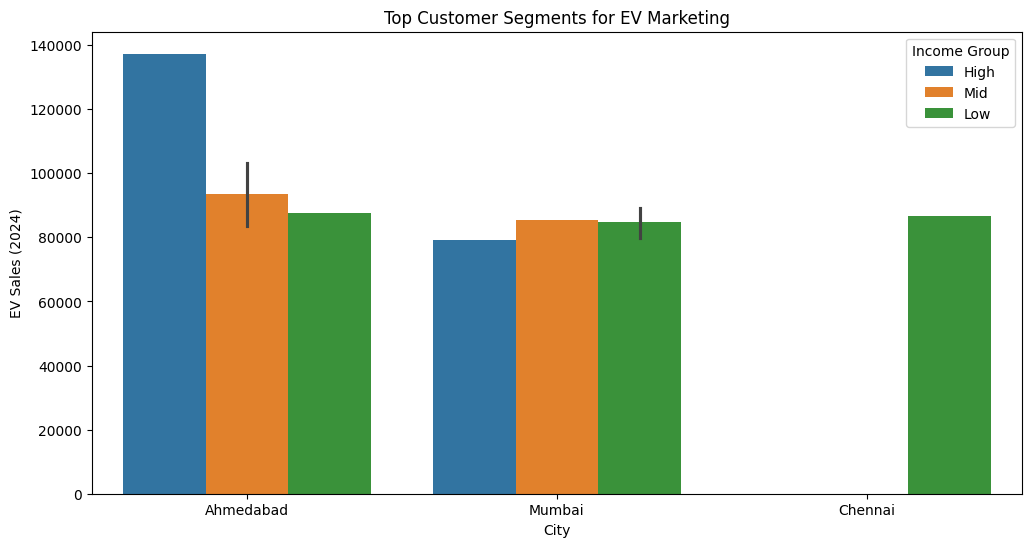

In [11]:
# Group by income group, age group, and city to analyze EV sales and switching rates

segmentation = df.groupby(['Income Group', 'Age Group', 'City']).agg({
    'EV Sales (2024)': 'sum',
    'ICE to EV Switch (%)': 'mean'
}).reset_index()

# Sort by EV sales to identify top segments 

top_segments = segmentation.sort_values(by='EV Sales (2024)', ascending=False).head(10)
print("Top Customer Segments for EV Marketing:")
print(top_segments)

# Visualization 

plt.figure(figsize=(12, 6))
sns.barplot(data=top_segments, x='City', y='EV Sales (2024)', hue='Income Group')
plt.title("Top Customer Segments for EV Marketing")
plt.show()

#### Optimizing Charging Infrastructure Deployment

Cities with High EV Sales but Low Charging Density:
        City  Charging Stations Density (per 100 sq km)  EV Sales (2024)  \
0  Ahmedabad                                      12.53           842503   
9     Mumbai                                      11.82           773068   
1  Bangalore                                      10.88           420564   
3     Delhi                                       10.96           413858   
5     Indore                                      11.50           428608   

   Charging Need  
0   67238.866720  
9   65403.384095  
1   38654.779412  
3   37760.766423  
5   37270.260870  


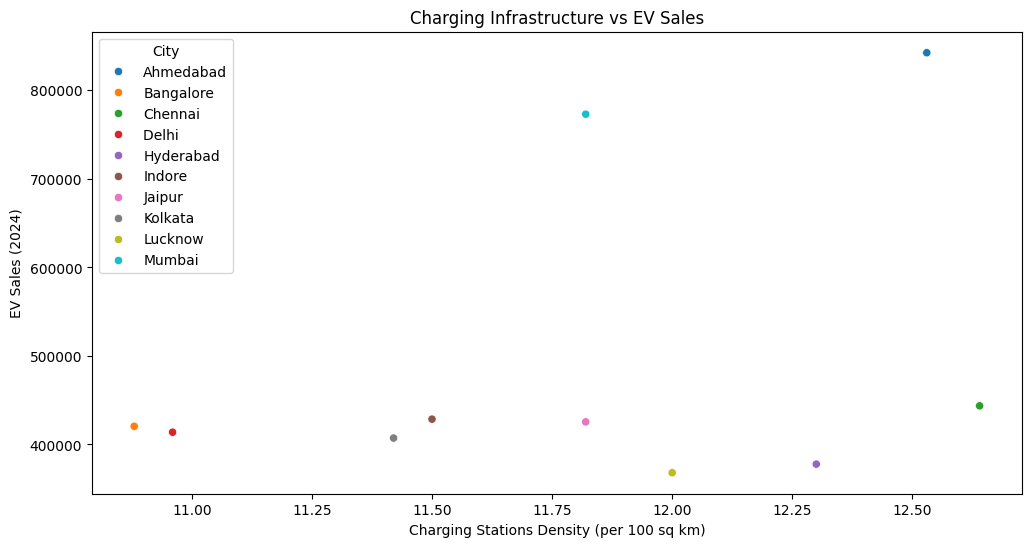

In [12]:
# Group by city to analyze charging station density and EV sales

charging_analysis = df.groupby('City').agg({
    'Charging Stations Density (per 100 sq km)': 'mean',
    'EV Sales (2024)': 'sum'
}).reset_index()


# Identifing cities with high EV sales but low charging density

charging_analysis['Charging Need'] = charging_analysis['EV Sales (2024)'] / charging_analysis['Charging Stations Density (per 100 sq km)']
charging_need = charging_analysis.sort_values(by='Charging Need', ascending=False).head(5)
print("Cities with High EV Sales but Low Charging Density:")
print(charging_need)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=charging_analysis, x='Charging Stations Density (per 100 sq km)', y='EV Sales (2024)', hue='City')
plt.title("Charging Infrastructure vs EV Sales")
plt.show()

#### Assessing the Impact of Government Incentives

Impact of Government Incentives on EV Adoption:
  Govt Incentive Awareness  EV Sales (2024)  ICE to EV Switch (%)
0                       No          2492522             12.590102
1                      Yes          2408357             12.217915


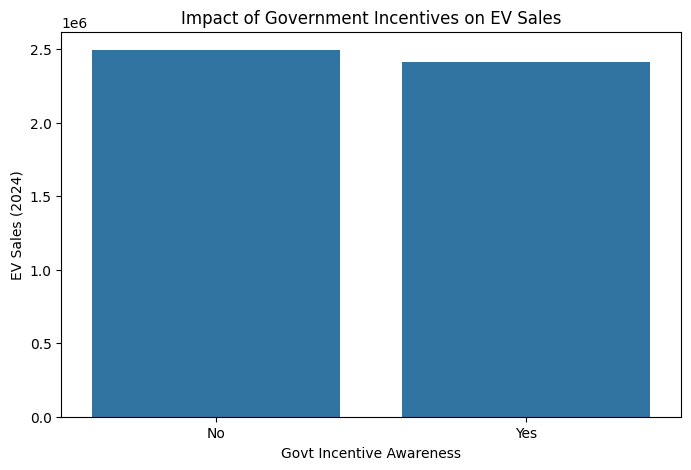

In [13]:
# Group by government incentive awareness to analyze EV sales and switching rates

incentive_analysis = df.groupby('Govt Incentive Awareness').agg({
    'EV Sales (2024)': 'sum',
    'ICE to EV Switch (%)': 'mean'
}).reset_index()

print("Impact of Government Incentives on EV Adoption:")
print(incentive_analysis)

# Visualization

plt.figure(figsize=(8, 5))
sns.barplot(data=incentive_analysis, x='Govt Incentive Awareness', y='EV Sales (2024)')
plt.title("Impact of Government Incentives on EV Sales")
plt.show()

#### Predicting Future EV Demand

High-Demand Segments for Future EV Sales:
          City Income Group Age Group  EV Sales (2024)
1    Ahmedabad         High     26-35           137283
8    Ahmedabad          Mid     18-25           103270
112     Mumbai          Low       50+            93278
4    Ahmedabad          Low     18-25            87666
28     Chennai          Low     18-25            86528
113     Mumbai          Mid     18-25            85467
10   Ahmedabad          Mid     36-50            83685
110     Mumbai          Low     26-35            80999
109     Mumbai          Low     18-25            79858
108     Mumbai         High       50+            79062


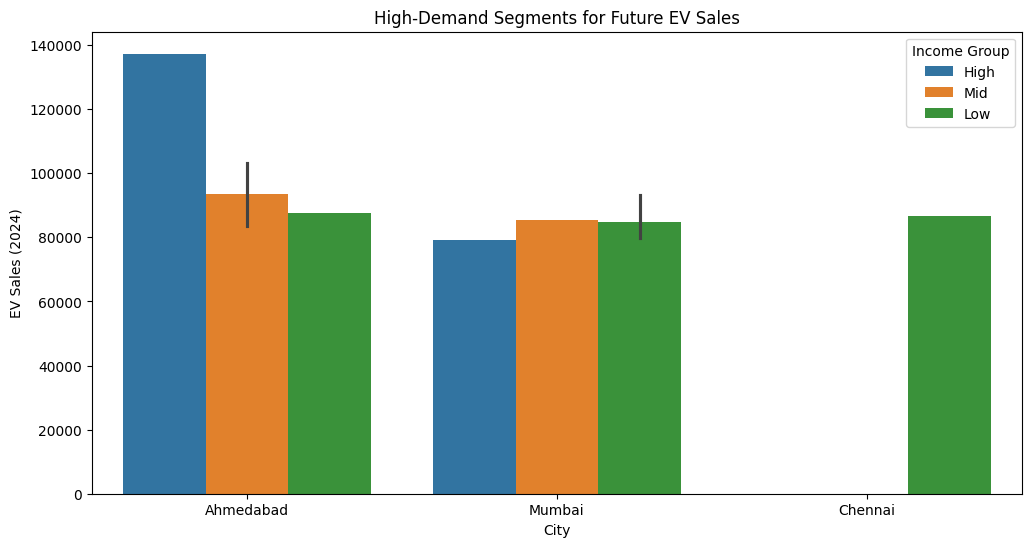

In [14]:
# Group by city, income group, and age group to analyze historical EV sales trends

future_demand = df.groupby(['City', 'Income Group', 'Age Group']).agg({
    'EV Sales (2024)': 'sum'
}).reset_index()

# Sorting by EV sales to identify high-demand segments

high_demand_segments = future_demand.sort_values(by='EV Sales (2024)', ascending=False).head(10)
print("High-Demand Segments for Future EV Sales:")
print(high_demand_segments)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=high_demand_segments, x='City', y='EV Sales (2024)', hue='Income Group')
plt.title("High-Demand Segments for Future EV Sales")
plt.show()

#### Understanding Barriers to EV Adoption

Segments with Low EV Sales Despite High Awareness:
         City Income Group Age Group  EV Sales (2024)  \
0   Ahmedabad         High     18-25             3852   
1   Ahmedabad         High     26-35            10992   
2   Ahmedabad         High     36-50             3670   
3   Ahmedabad          Low     18-25             1650   
4   Ahmedabad          Low     26-35            11812   
5   Ahmedabad          Low     36-50             4969   
6   Ahmedabad          Mid     36-50             2408   
7   Ahmedabad          Mid       50+             2011   
8   Bangalore         High     18-25             4076   
9   Bangalore         High     26-35             2965   
10  Bangalore          Low     26-35             4976   
11  Bangalore          Mid     36-50             4751   
12  Bangalore          Mid       50+            11213   
13    Chennai         High     36-50             2311   
14    Chennai         High       50+             4397   
15    Chennai          Low     26-35 

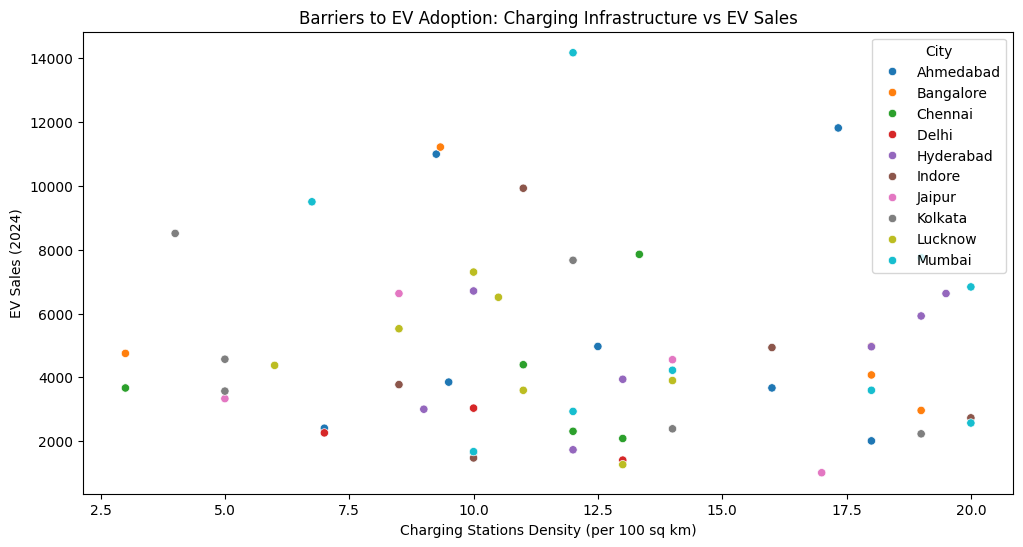

In [15]:
# Analyzing segments with low EV sales despite high awareness

barrier_analysis = df[(df['EV Awareness Score'] > 7) & (df['EV Sales (2024)'] < 5000)]
barrier_segments = barrier_analysis.groupby(['City', 'Income Group', 'Age Group']).agg({
    'EV Sales (2024)': 'sum',
    'Charging Stations Density (per 100 sq km)': 'mean'
}).reset_index()

print("Segments with Low EV Sales Despite High Awareness:")
print(barrier_segments)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=barrier_segments, x='Charging Stations Density (per 100 sq km)', y='EV Sales (2024)', hue='City')
plt.title("Barriers to EV Adoption: Charging Infrastructure vs EV Sales")
plt.show()

#### Developing Competitive Pricing Strategies

EV Sales and Switching Rates by Income Group:
  Income Group  EV Sales (2024)  ICE to EV Switch (%)
0         High          1683523             12.754717
1          Low          1728757             12.114085
2          Mid          1488599             12.317143


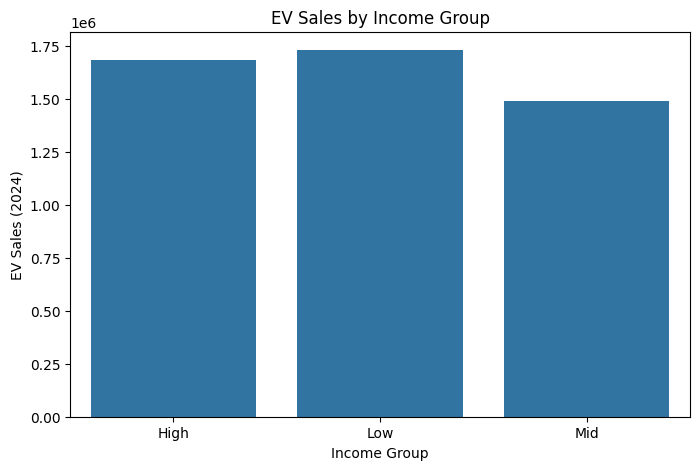

In [16]:
# Group by income group to analyze EV sales and switching rates

pricing_analysis = df.groupby('Income Group').agg({
    'EV Sales (2024)': 'sum',
    'ICE to EV Switch (%)': 'mean'
}).reset_index()

print("EV Sales and Switching Rates by Income Group:")
print(pricing_analysis)

# Visualization

plt.figure(figsize=(8, 5))
sns.barplot(data=pricing_analysis, x='Income Group', y='EV Sales (2024)')
plt.title("EV Sales by Income Group")
plt.show()

#### Improving Customer Experience for EV Owners

Charging Infrastructure for Long Commuters:
        City  Charging Stations Density (per 100 sq km)  EV Sales (2024)
0  Ahmedabad                                  12.968750           280493
1  Bangalore                                  10.133333           126006
2    Chennai                                  14.166667           122845
3     Delhi                                   11.230769            92320
4  Hyderabad                                  13.736842           144967
5     Indore                                  12.400000            88940
6     Jaipur                                  11.461538           117131
7    Kolkata                                  11.894737           175178
8    Lucknow                                  10.571429           103043
9     Mumbai                                  14.947368           140801


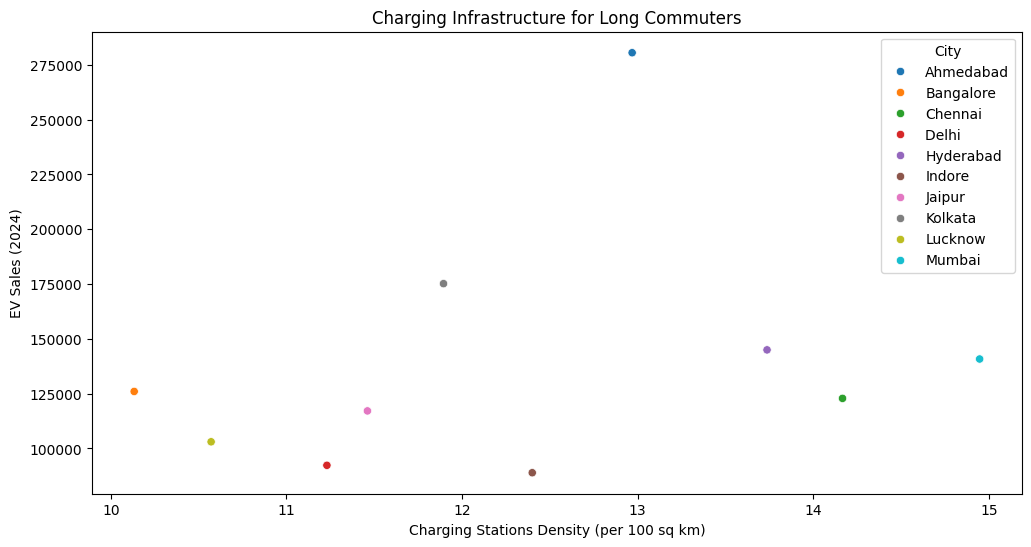

In [17]:
# Analyzing long commuters and charging infrastructure

long_commuters = df[df['Daily Commute (km)'] > 30]
commuter_analysis = long_commuters.groupby('City').agg({
    'Charging Stations Density (per 100 sq km)': 'mean',
    'EV Sales (2024)': 'sum'
}).reset_index()

print("Charging Infrastructure for Long Commuters:")
print(commuter_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=commuter_analysis, x='Charging Stations Density (per 100 sq km)', y='EV Sales (2024)', hue='City')
plt.title("Charging Infrastructure for Long Commuters")
plt.show()

#### Evaluating the ROI of Awareness Campaigns

Impact of EV Awareness on Sales:
    EV Awareness Score  EV Sales (2024)
0                  5.0            54827
1                  5.1           103819
2                  5.2            92677
3                  5.3            86764
4                  5.4           170762
5                  5.5           155367
6                  5.6            90488
7                  5.7           118954
8                  5.8            91608
9                  5.9           103793
10                 6.0           123366
11                 6.1            55537
12                 6.2            70206
13                 6.3           128124
14                 6.4           110255
15                 6.5            75463
16                 6.6           118393
17                 6.7           118408
18                 6.8            75959
19                 6.9            99944
20                 7.0           103939
21                 7.1           107033
22                 7.2           108329
23     

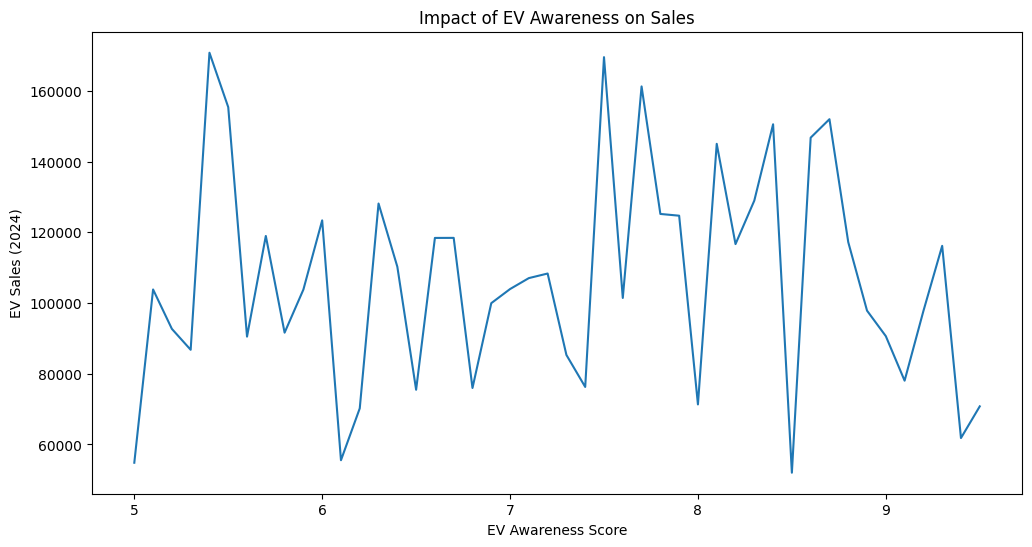

In [18]:
# Group by EV awareness score to analyze EV sales

awareness_analysis = df.groupby('EV Awareness Score').agg({
    'EV Sales (2024)': 'sum'
}).reset_index()

print("Impact of EV Awareness on Sales:")
print(awareness_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.lineplot(data=awareness_analysis, x='EV Awareness Score', y='EV Sales (2024)')
plt.title("Impact of EV Awareness on Sales")
plt.show()

#### Addressing Regional Disparities in EV Adoption

Regional Disparities in EV Adoption:
        City  EV Sales (2024)  Charging Stations Density (per 100 sq km)
0  Ahmedabad           842503                                      12.53
1  Bangalore           420564                                      10.88
2    Chennai           443658                                      12.64
3     Delhi            413858                                      10.96
4  Hyderabad           377792                                      12.30
5     Indore           428608                                      11.50
6     Jaipur           425499                                      11.82
7    Kolkata           407242                                      11.42
8    Lucknow           368087                                      12.00
9     Mumbai           773068                                      11.82


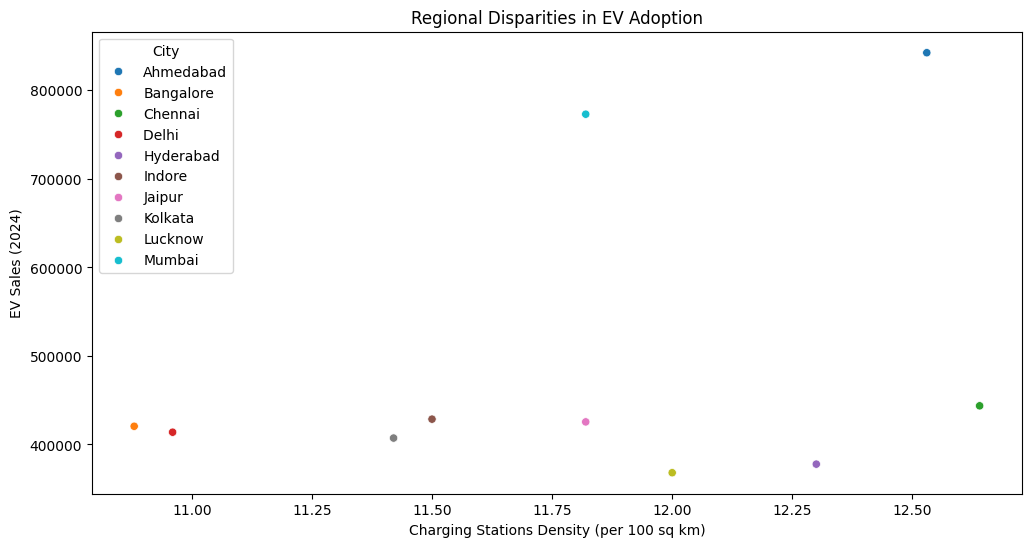

In [19]:
# Analyzing EV adoption by city

regional_analysis = df.groupby('City').agg({
    'EV Sales (2024)': 'sum',
    'Charging Stations Density (per 100 sq km)': 'mean'
}).reset_index()

print("Regional Disparities in EV Adoption:")
print(regional_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=regional_analysis, x='Charging Stations Density (per 100 sq km)', y='EV Sales (2024)', hue='City')
plt.title("Regional Disparities in EV Adoption")
plt.show()

#### Designing EV Models for Specific Segments

Preferred EV Types by Income and Age Groups:
   Income Group Age Group Preferred EV Type  EV Sales (2024)
0          High     18-25      Scooter/Bike           121625
1          High     18-25         Sedan/SUV           205559
2          High     18-25  Truck/Commercial           135802
3          High     26-35      Scooter/Bike           166057
4          High     26-35         Sedan/SUV           145915
5          High     26-35  Truck/Commercial           149693
6          High     36-50      Scooter/Bike           123323
7          High     36-50         Sedan/SUV           143181
8          High     36-50  Truck/Commercial            55453
9          High       50+      Scooter/Bike           185698
10         High       50+         Sedan/SUV           142885
11         High       50+  Truck/Commercial           108332
12          Low     18-25      Scooter/Bike           161022
13          Low     18-25         Sedan/SUV           183637
14          Low     18-25  Truck/Commerc

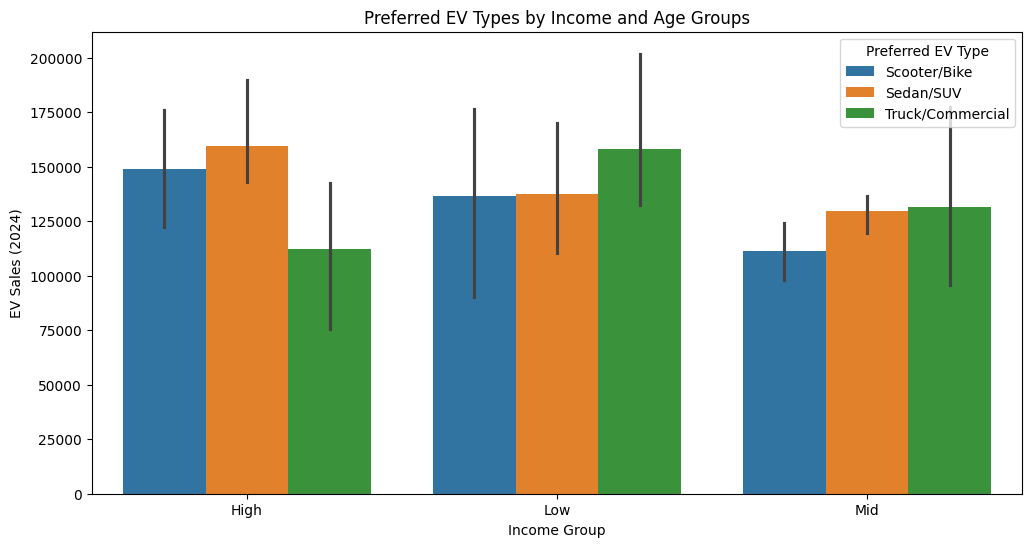

In [20]:
# Analyzing preferred EV types by income and age groups

ev_type_analysis = df.groupby(['Income Group', 'Age Group', 'Preferred EV Type']).agg({
    'EV Sales (2024)': 'sum'
}).reset_index()

print("Preferred EV Types by Income and Age Groups:")
print(ev_type_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=ev_type_analysis, x='Income Group', y='EV Sales (2024)', hue='Preferred EV Type')
plt.title("Preferred EV Types by Income and Age Groups")
plt.show()

#### Reducing Carbon Footprint in High-Traffic Cities

EV Adoption in High-Traffic Cities:
     City  EV Sales (2024)  Charging Stations Density (per 100 sq km)
0  Mumbai           773068                                      11.82


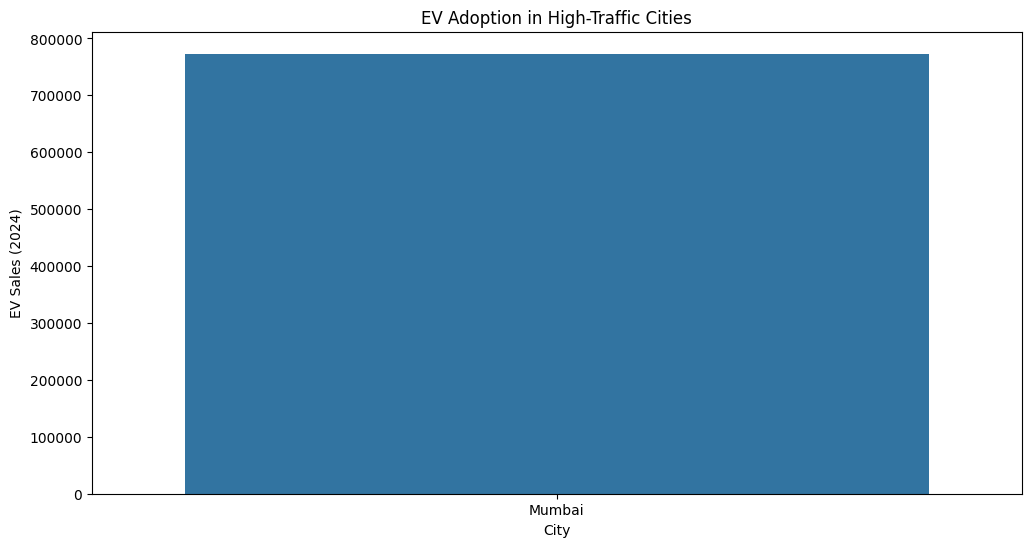

In [21]:
# Focusing on high-traffic cities

high_traffic_cities = ['Delhi', 'Mumbai', 'Bengaluru']
traffic_analysis = df[df['City'].isin(high_traffic_cities)].groupby('City').agg({
    'EV Sales (2024)': 'sum',
    'Charging Stations Density (per 100 sq km)': 'mean'
}).reset_index()

print("EV Adoption in High-Traffic Cities:")
print(traffic_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=traffic_analysis, x='City', y='EV Sales (2024)')
plt.title("EV Adoption in High-Traffic Cities")
plt.show()

#### Assessing the Impact of Daily Commute on EV Adoption

EV Adoption by Daily Commute Distance:
    Daily Commute (km)  EV Sales (2024)
0                    5           148134
1                    6           112943
2                    7           107876
3                    8           170050
4                    9           135546
5                   10           135735
6                   11           214708
7                   12            94505
8                   13           115910
9                   14            65941
10                  15            92671
11                  16           152902
12                  17           148961
13                  18           214857
14                  19           118960
15                  20           161864
16                  21            95492
17                  22           135053
18                  23           132763
19                  24           101467
20                  25            73625
21                  26           133699
22                  27           173111
2

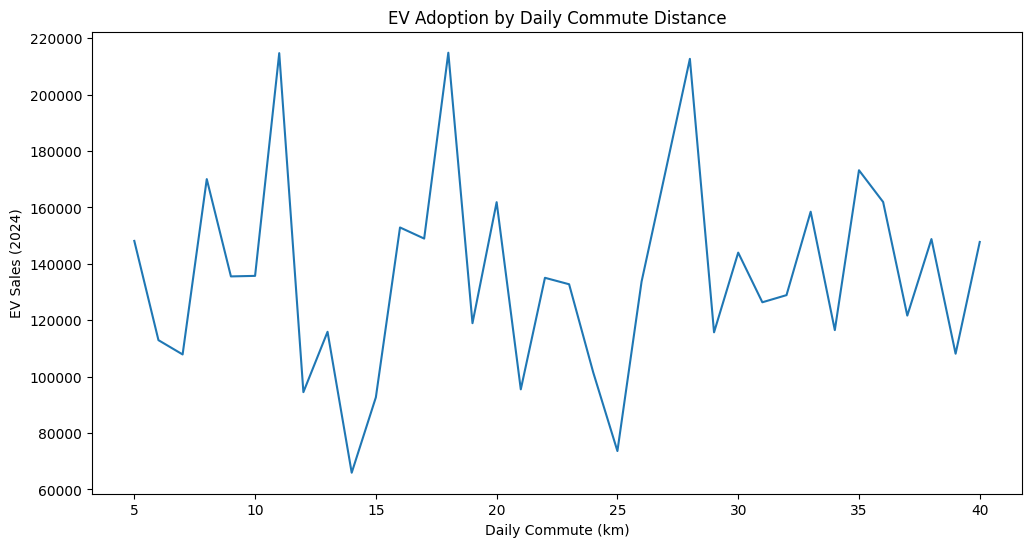

In [22]:
# Analyzing EV adoption by daily commute distance

commute_analysis = df.groupby('Daily Commute (km)').agg({
    'EV Sales (2024)': 'sum'
}).reset_index()

print("EV Adoption by Daily Commute Distance:")
print(commute_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.lineplot(data=commute_analysis, x='Daily Commute (km)', y='EV Sales (2024)')
plt.title("EV Adoption by Daily Commute Distance")
plt.show()   

## **Clustering**

#### **Important libraries for clustering**

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

#### **1. K-Means Clustering for Customer Segmentation**

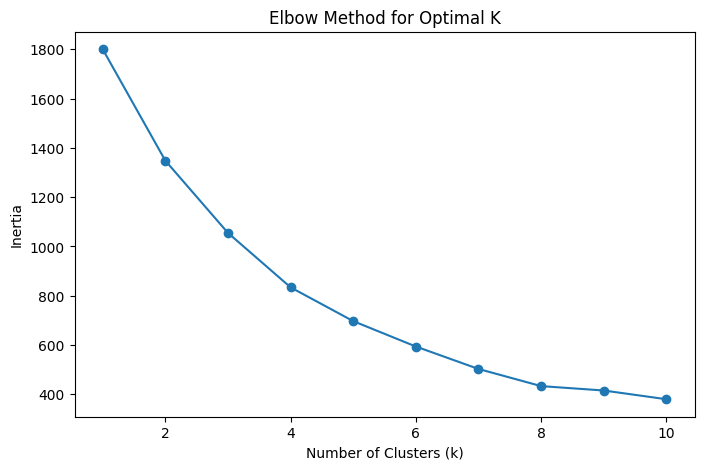

Cluster Analysis:
   Cluster  EV Awareness Score  Daily Commute (km)  EV Sales (2024)
0        0            8.503483           23.233831      5971.228856
1        1            7.123894           21.712389     12367.119469
2        2            6.041618           23.150289      5235.219653


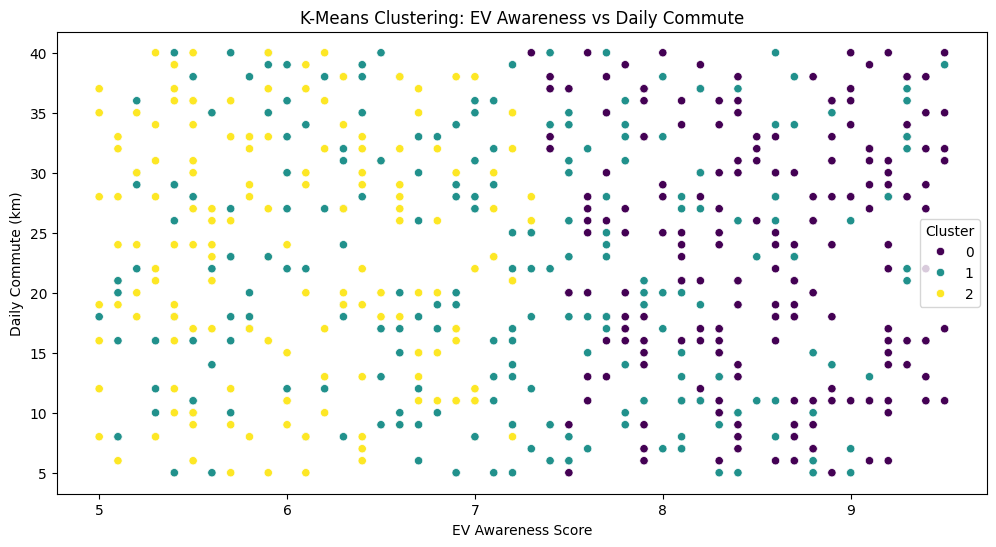

In [24]:
# Selecting the  relevant features for clustering

features = ['EV Awareness Score', 'Daily Commute (km)', 'EV Sales (2024)']
X = df[features]

## Standardize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Elbow Method

inertia = []       
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means clustering with the optimal number of clusters (e.g., k=3)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


cluster_analysis = df.groupby('Cluster').agg({
    'EV Awareness Score': 'mean',
    'Daily Commute (km)': 'mean',
    'EV Sales (2024)': 'mean'
}).reset_index()

print("Cluster Analysis:")
print(cluster_analysis)


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='EV Awareness Score', y='Daily Commute (km)', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering: EV Awareness vs Daily Commute")
plt.show()

#### **2. Hierarchical Clustering for City Segmentation**

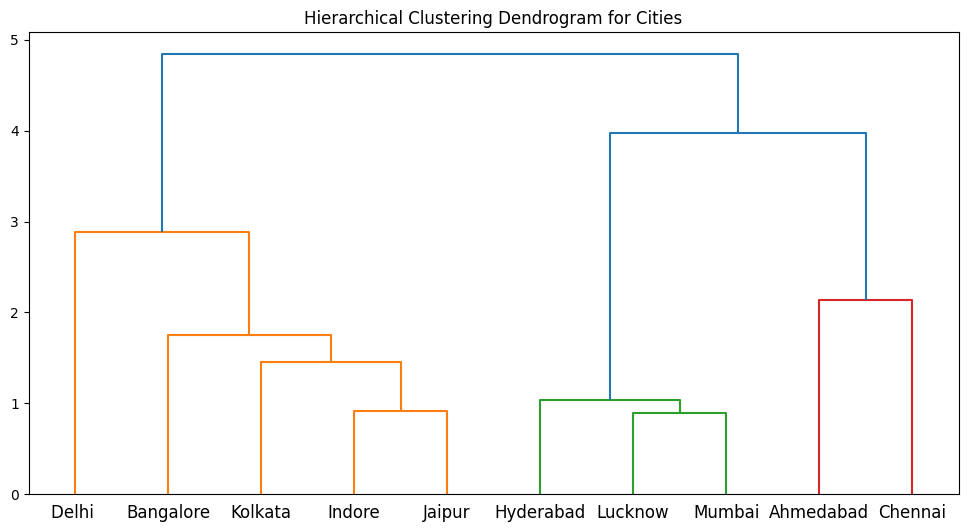

In [25]:
# Selecting relevant features for clustering

city_features = ['EV Sales (2024)', 'Charging Stations Density (per 100 sq km)', 'EV Awareness Score']
city_data = df.groupby('City')[city_features].mean().reset_index()

# Standardize the features

scaler = StandardScaler()
city_data_scaled = scaler.fit_transform(city_data[city_features])

# hierarchical clustering

linked = linkage(city_data_scaled, method='ward')

# dendrogram

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=city_data['City'].values, orientation='top')
plt.title("Hierarchical Clustering Dendrogram for Cities")
plt.show()

City Cluster Analysis:
   Cluster  EV Sales (2024)  Charging Stations Density (per 100 sq km)  \
0        0         8383.084                                     11.316   
1        1         8649.095                                     12.585   
2        2         7549.420                                     12.040   

   EV Awareness Score  
0            7.348000  
1            7.206000  
2            7.199333  


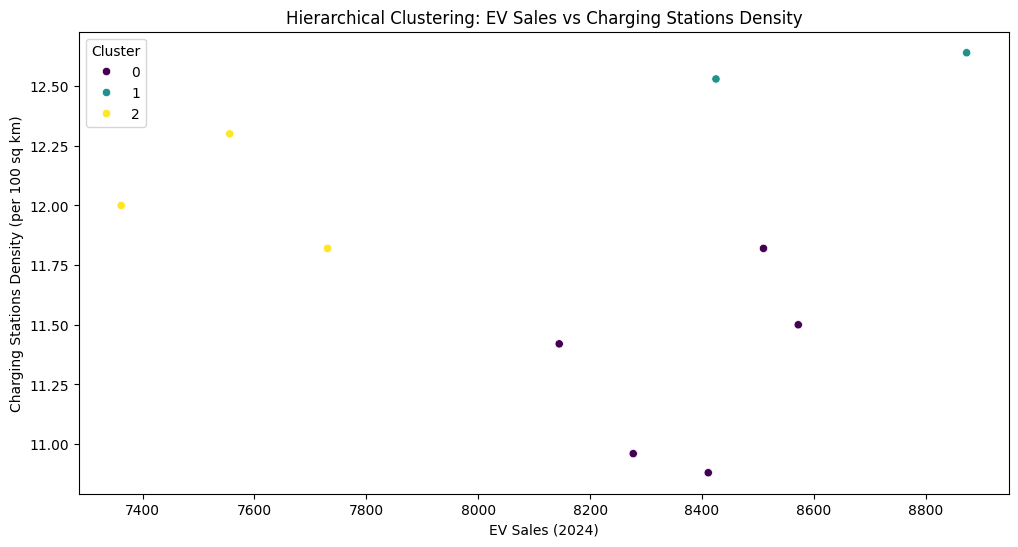

In [26]:
# Assign clusters

cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
city_data['Cluster'] = cluster.fit_predict(city_data_scaled)

# Analyze the clusters

city_cluster_analysis = city_data.groupby('Cluster').agg({
    'EV Sales (2024)': 'mean',
    'Charging Stations Density (per 100 sq km)': 'mean',
    'EV Awareness Score': 'mean'
}).reset_index()

print("City Cluster Analysis:")
print(city_cluster_analysis)

# Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(data=city_data, x='EV Sales (2024)', y='Charging Stations Density (per 100 sq km)', hue='Cluster', palette='viridis')
plt.title("Hierarchical Clustering: EV Sales vs Charging Stations Density")
plt.show()

####  **3. PCA for Dimensionality Reduction and Visualization**

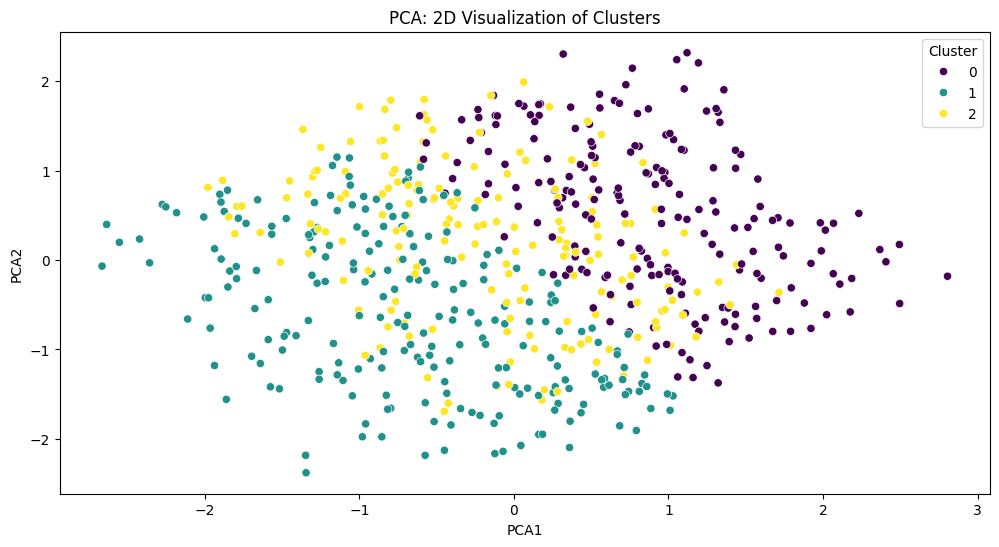

In [27]:
# Applying PCA to reduce features to 2 dimensions

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Adding PCA components 

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize the clusters in 2D

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("PCA: 2D Visualization of Clusters")
plt.show()

#### 2D and 3D Visualizations for K-Means Clustering

In [28]:
# Select features for clustering
features = ['EV Awareness Score', 'Daily Commute (km)', 'EV Sales (2024)']
X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#### 2D Scatter Plot (EV Awareness vs Daily Commute)



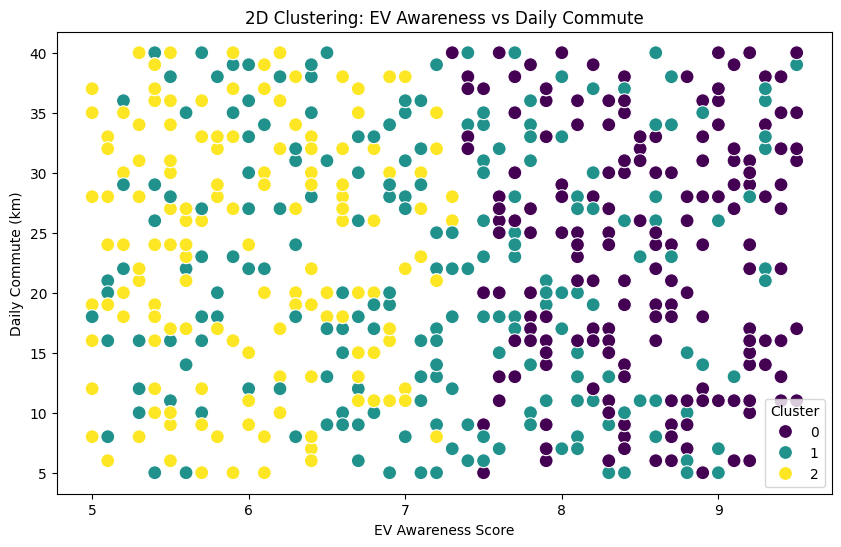

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='EV Awareness Score', 
    y='Daily Commute (km)', 
    hue='Cluster', 
    palette='viridis',
    s=100
)
plt.title("2D Clustering: EV Awareness vs Daily Commute")
plt.xlabel("EV Awareness Score")
plt.ylabel("Daily Commute (km)")
plt.show()

#### **3D Scatter Plot (EV Awareness, Commute, Sales)**

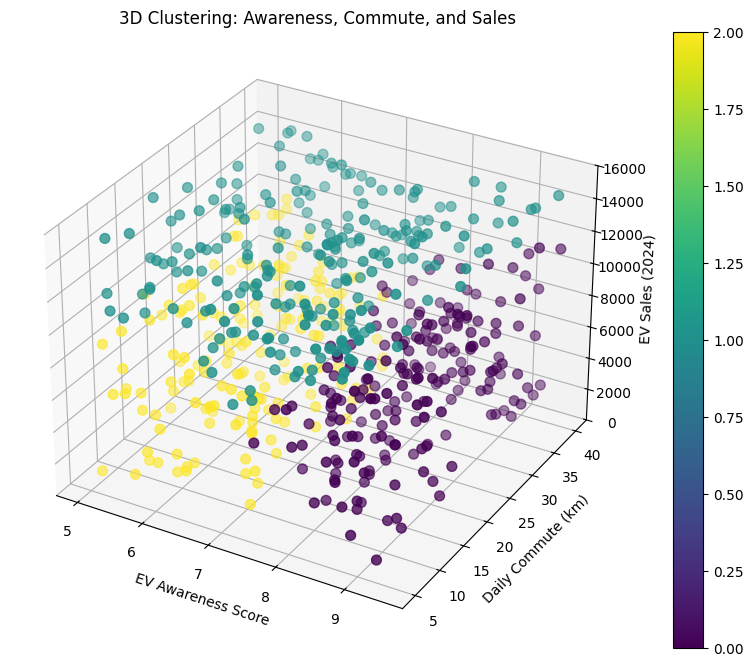

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['EV Awareness Score'],
    df['Daily Commute (km)'],
    df['EV Sales (2024)'],
    c=df['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_xlabel("EV Awareness Score")
ax.set_ylabel("Daily Commute (km)")
ax.set_zlabel("EV Sales (2024)")
plt.title("3D Clustering: Awareness, Commute, and Sales")
plt.colorbar(scatter)
plt.show()

#### 2D and 3D Visualizations for Hierarchical Clustering

Prepare City-Level Data


In [31]:
city_features = ['EV Sales (2024)', 'Charging Stations Density (per 100 sq km)', 'EV Awareness Score']
city_data = df.groupby('City')[city_features].mean().reset_index()

# Standardize
city_data_scaled = scaler.fit_transform(city_data[city_features])

# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
city_data['Cluster'] = cluster.fit_predict(city_data_scaled)

#### 2D Scatter Plot (EV Sales vs Charging Density)

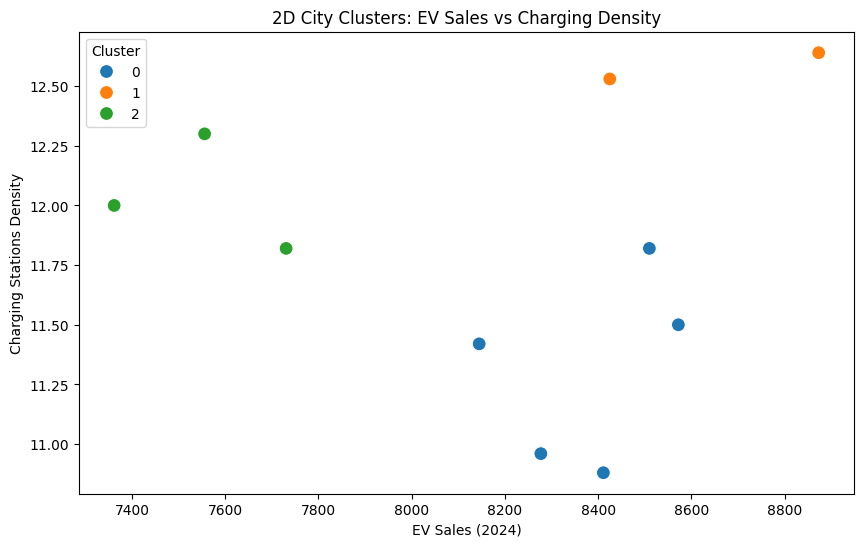

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=city_data, 
    x='EV Sales (2024)', 
    y='Charging Stations Density (per 100 sq km)', 
    hue='Cluster', 
    palette='tab10',
    s=100
)
plt.title("2D City Clusters: EV Sales vs Charging Density")
plt.xlabel("EV Sales (2024)")
plt.ylabel("Charging Stations Density")
plt.show()

#### 3D Scatter Plot (EV Sales, Charging Density, Awareness)

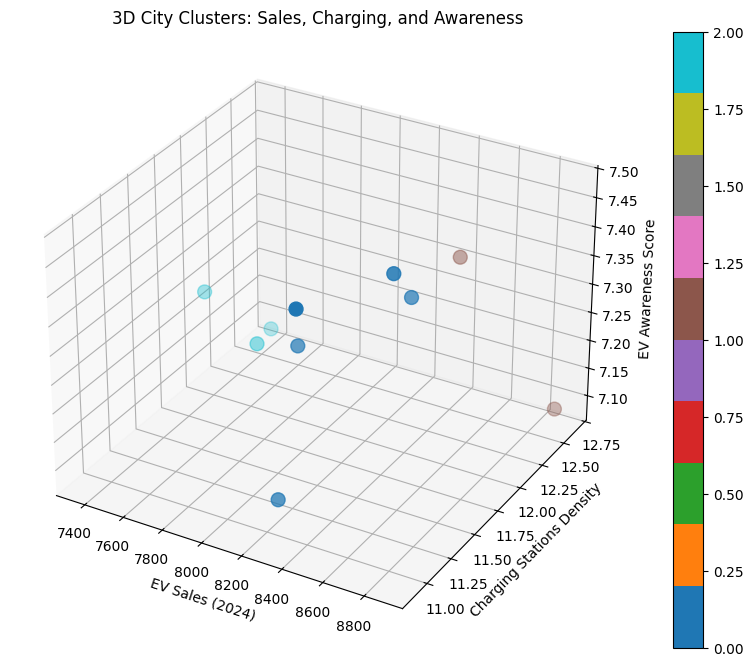

In [33]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    city_data['EV Sales (2024)'],
    city_data['Charging Stations Density (per 100 sq km)'],
    city_data['EV Awareness Score'],
    c=city_data['Cluster'],
    cmap='tab10',
    s=100
)

ax.set_xlabel("EV Sales (2024)")
ax.set_ylabel("Charging Stations Density")
ax.set_zlabel("EV Awareness Score")
plt.title("3D City Clusters: Sales, Charging, and Awareness")
plt.colorbar(scatter)
plt.show()

## **Advanced Clustering**

#### **1. Gaussian Mixture Models (GMM)**

In [34]:
from sklearn.mixture import GaussianMixture


features = ['EV Awareness Score', 'Daily Commute (km)', 'EV Sales (2024)']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

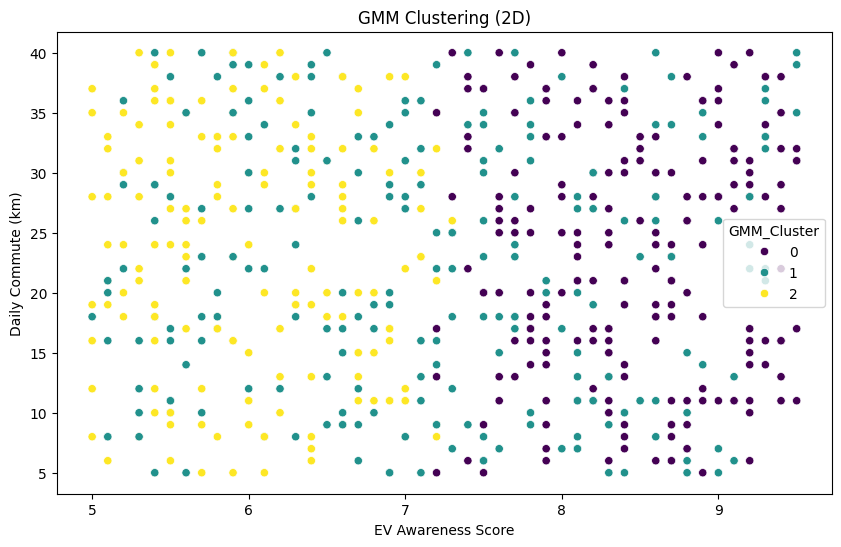

In [35]:
# 2D Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='EV Awareness Score', y='Daily Commute (km)', hue='GMM_Cluster', palette='viridis')
plt.title("GMM Clustering (2D)")
plt.show()

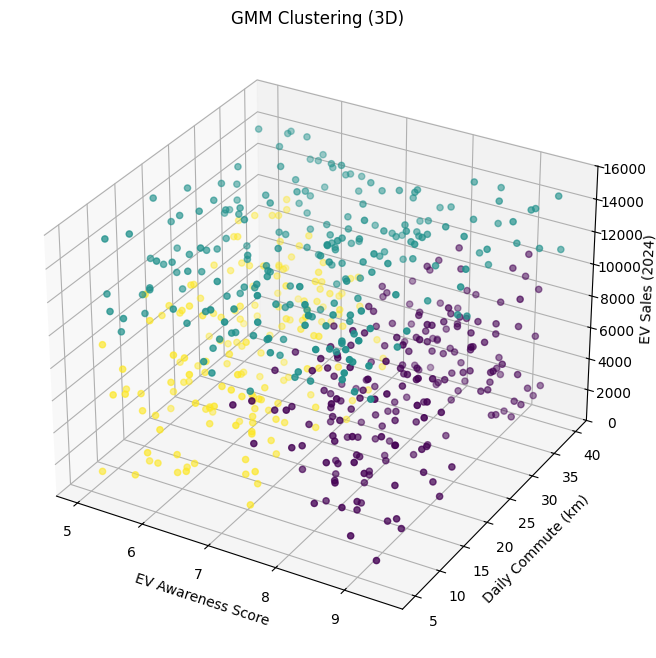

In [36]:
# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['EV Awareness Score'], df['Daily Commute (km)'], df['EV Sales (2024)'], c=df['GMM_Cluster'], cmap='viridis')
ax.set_xlabel("EV Awareness Score")
ax.set_ylabel("Daily Commute (km)")
ax.set_zlabel("EV Sales (2024)")
plt.title("GMM Clustering (3D)")
plt.show()

#### **2. Mean Shift**

In [37]:
from sklearn.cluster import MeanShift

# Fit Mean Shift
ms = MeanShift(bandwidth=2)  # Adjust bandwidth based on data scale
df['MeanShift_Cluster'] = ms.fit_predict(X_scaled)

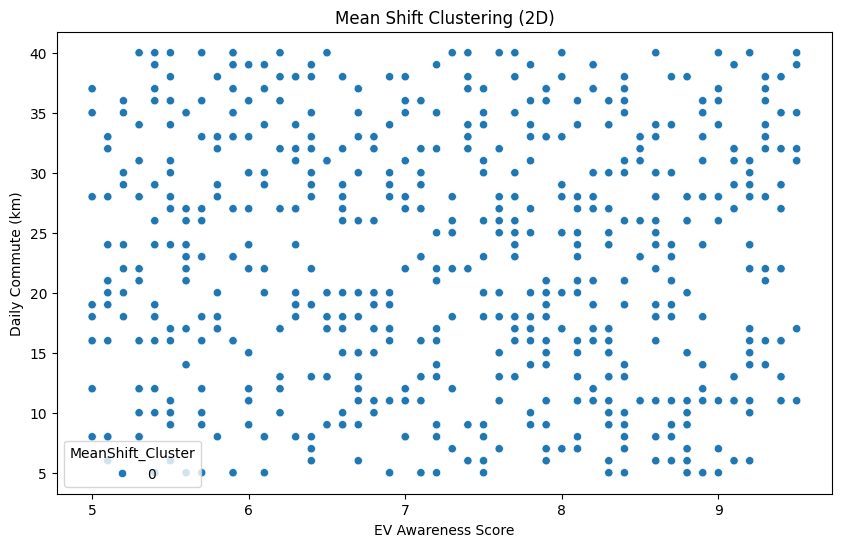

In [38]:
# 2D Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='EV Awareness Score', y='Daily Commute (km)', hue='MeanShift_Cluster', palette='tab10')
plt.title("Mean Shift Clustering (2D)")
plt.show()


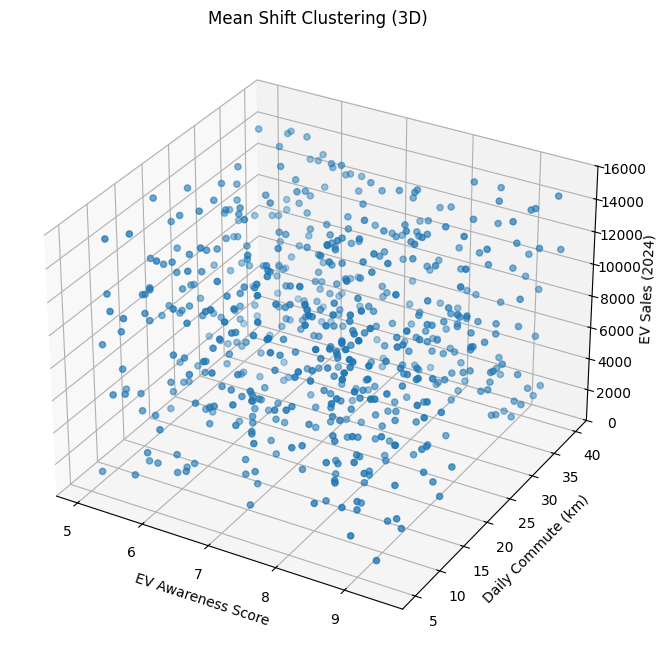

In [39]:
# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['EV Awareness Score'], df['Daily Commute (km)'], df['EV Sales (2024)'], c=df['MeanShift_Cluster'], cmap='tab10')
ax.set_xlabel("EV Awareness Score")
ax.set_ylabel("Daily Commute (km)")
ax.set_zlabel("EV Sales (2024)")
plt.title("Mean Shift Clustering (3D)")
plt.show() 

#### **3. Spectral Clustering**

In [40]:
from sklearn.cluster import SpectralClustering

# Fit Spectral Clustering
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
df['Spectral_Cluster'] = sc.fit_predict(X_scaled)

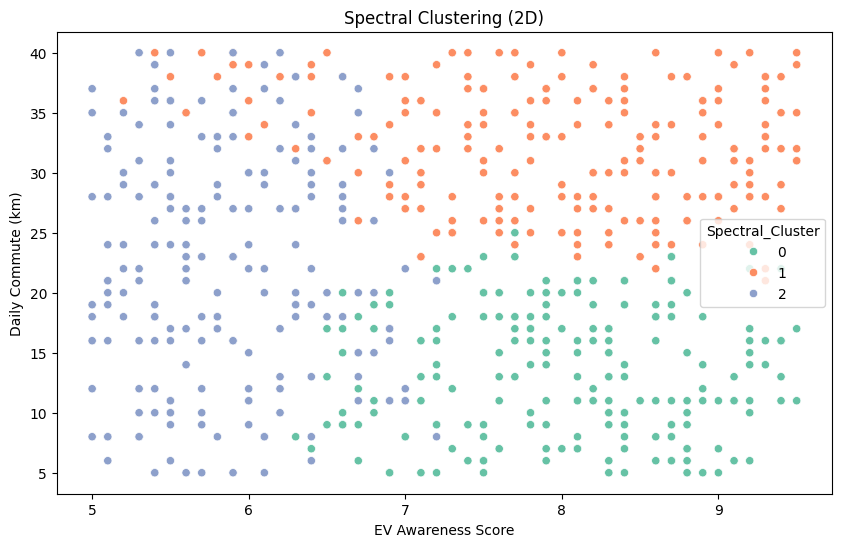

In [41]:
# 2D Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='EV Awareness Score', y='Daily Commute (km)', hue='Spectral_Cluster', palette='Set2')
plt.title("Spectral Clustering (2D)")
plt.show()

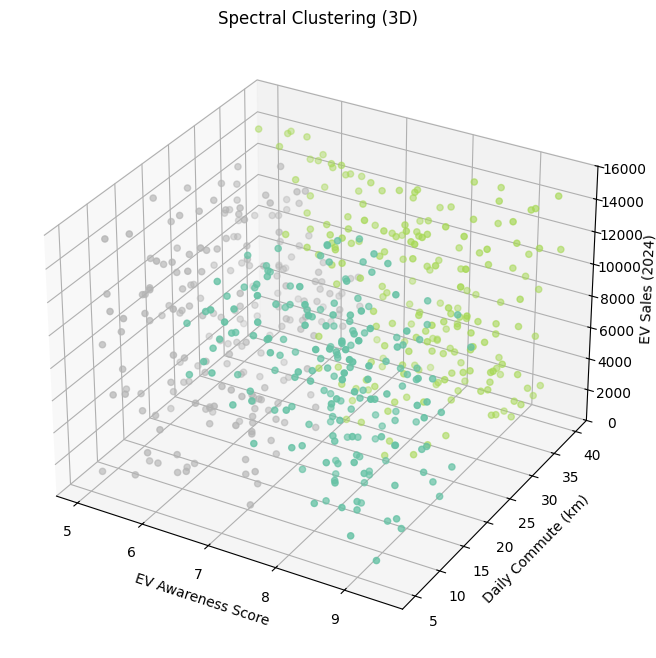

In [42]:
# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['EV Awareness Score'], df['Daily Commute (km)'], df['EV Sales (2024)'], c=df['Spectral_Cluster'], cmap='Set2')
ax.set_xlabel("EV Awareness Score")
ax.set_ylabel("Daily Commute (km)")
ax.set_zlabel("EV Sales (2024)")
plt.title("Spectral Clustering (3D)")
plt.show()